# Defining a network
Describing our network to be run on the hardware (or the python simulator) is done using three data structures, corresponding to three dictionaries:
- config
- axons
- connections

In this notebook, we will setup the following example network:


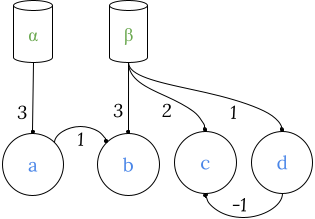

## Defining a configuration dictionary

The configuration dictionary specifies some properties that are shared by every neuron in the network:

| Parameter   | Description |
| :-          | :-          |
| neuron_type | the type of neuron model used to calculate membrane potentials. Possible assignments: |
| <ul><li>I&F</li></ul> | integrate and fire |
| <ul><li> </li></ul>   | binary threshold   |
| <ul><li>LIF</li></ul> | leaky integrate and fire |
| global_neuron_params | a sub-dictionary of the configuration dictionary, contains: |
| <ul><li>v_thr</li></ul> | sets the membrane potential threshold for all neurons in the network |
| <ul><li>v_rst</li></ul> | |
| <ul><li>v_alpha</li></ul> | |

In [19]:
config = {}
config['neuron_type'] = "I&F" # use integrate-and-fire neurons

config['global_neuron_params'] = {}
config['global_neuron_params']['v_thr'] = 4
config['global_neuron_params']['v_rst'] = 0
config['global_neuron_params']['v_alpha'] = 0 # this is only needed for leaky integrate-and-fire neurons

# are there other neuron parameters?

## Defining the axons dictionary
The axons dictionary configures inputs to the network. Axons are synapses to neurons in the network that the user can manually send spikes over at a given timestep. 

Below is a template for the axons dictionary:

```
axons = {
    'name of axon': [
        ('name of neuron', weight), 
        ('name of neuron', weight), 
        ...
    ],
    'name of axon': [
        ('name of neuron', weight), 
        ('name of neuron', weight), 
        ...
    ],
    ...
}
```

Each key in the dictionary is the name of an axon. 

Each value is a list of two-element tuples, where each tuple defines an in-going synapse to a neuron. The first element is the name of a neuron in the network and the second element is the weight of the synaptic connection. 

Synapse weights must be integers, but they may be positive or negative.

In [44]:
axons = {
    'alpha': [('a', 3)],
    'beta': [('b', 3), ('c', 2), ('d', 1)]
}

## Defining the connections dictionary
The connections dictionary defines the neurons in the network and the connections between them. 

Below is a template for the connections dictionary:

```
connections = {
    'name of pre-synaptic neuron': [
        ('name of post-synaptic neuron', weight), 
        ('name of post-synaptic neuron', weight), 
        ...
    ],
    'name of pre-synaptic neuron': [], # can be left empty
    ...
}
```

Each key in the dictionary is the name of a neuron. Note that the names of neurons in the connections dictionary and the names of axons in the axons dictionary must be mutually exclusive. 

Each value is a list of two element tuples. Each tuple defines a synapse between neurons in the network. The first element is the name of the postsynaptic neuron and the the second element is the weight of the synapse. 

Synapse weights must be integers but they may be positive or negative. 

If a neuron has no outgoing synapses it’s synapse list may be left empty.

In [45]:
connections = {
    'a': [('b', 1)],
    'b': [],
    'c': [],
    'd': [('c', -1)]
}

# Initializing a network
Once we’ve defined the above dictionaries we must pass them to the ```CRI_network``` constructor to create a ```CRI_network``` object.

In [54]:
# may need l2s in path, or start notebook from the the /L2S directory
# % cd ..
# ! ls

from l2s.api import CRI_network

In [55]:
network = CRI_network(
    axons=axons,
    connections=connections,
    config=config,
    inputs=[],
)

moo


# Running a timestep
Once we’ve constructed an CRI_network object we can run a timestep. We do so by calling the ```step()``` method of CRI_network. This method expects a single input called inputs. 

Inputs defines the inputs to the network at the current timestep as a list of axon names that you wish to carry spikes into the network at the current timestep. An empty list could be supplied if no external input is to be provided for a given step.

```step()``` outputs the membrane potential of each neuron in the network.

In [56]:
network.step(inputs=['alpha', 'beta'] ) # deliver a spike each over axons 'alpha' and 'beta'

[('a', 3.0), ('b', 3.0), ('c', 2.0), ('d', 1.0)]

In [57]:
network.step([]) # no input

[('a', 3.0), ('b', 3.0), ('c', 2.0), ('d', 1.0)]

In [58]:
network.step(['alpha']) # 'a' will have exceeded its threshold, but it fires at the next step.

[('a', 6.0), ('b', 3.0), ('c', 2.0), ('d', 1.0)]

In [59]:
network.step([]) # 'a' has fired now, and it resets to v_rst = 0
# note that 'b' gets an input from 'a', and its now at its threshold too, but it must exceed its threshold to fire.

[('a', 0.0), ('b', 4.0), ('c', 2.0), ('d', 1.0)]

In [60]:
network.step(['beta']) # now 'b' has exceeded its threshold

[('a', 0.0), ('b', 7.0), ('c', 4.0), ('d', 2.0)]

In [61]:
network.step([]) # 'b' will have fired now

[('a', 0.0), ('b', 0.0), ('c', 4.0), ('d', 2.0)]